In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
from keras.layers import *
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


2024-04-24 07:07:44.595395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 07:07:44.595493: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 07:07:44.731510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
training_path="/kaggle/input/faceshape-processed/dataset/train"
testing_path="/kaggle/input/faceshape-processed/dataset/test"
labels=["Heart","Oblong","Oval","Round","Square"]
data=[]
result=[]

for index,label in enumerate(labels):

    eff_dir=os.listdir(os.path.join(training_path,label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(training_path,label,img_name))
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128,128))
        data.append(np.array(image))
        result.append(index)

    eff_dir=os.listdir(os.path.join(testing_path,label))
    for img_name in eff_dir:
        image = cv2.imread(os.path.join(testing_path,label,img_name))
        image = Image.fromarray(image, 'RGB')
        image = image.resize((128,128))
        data.append(np.array(image))
        result.append(index)

x=np.array(data)
y=np.array(result)
# y=to_categorical(y)

x_train,x_test,y_train,y_test=train_test_split(x/255,y,test_size=0.2)
x=None
y=None

In [3]:
model1=keras.Sequential()
model1.add(Conv2D(64, (3,3), input_shape = (128,128,3)))
model1.add(keras.layers.LeakyReLU(alpha=0.05))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.4))

model1.add(Conv2D(32, (3,3)))
model1.add(keras.layers.LeakyReLU(alpha=0.05))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3,3)))
model1.add(keras.layers.LeakyReLU(alpha=0.05))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3,3)))
model1.add(keras.layers.LeakyReLU(alpha=0.05))
model1.add(MaxPool2D(pool_size = (2, 2)))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.3))

model1.add(Flatten())

model1.add(Dense(units=512))
model1.add(keras.layers.LeakyReLU(alpha=0.01))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.4))

model1.add(Dense(units=256))
model1.add(keras.layers.LeakyReLU(alpha=0.01))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.2))

model1.add(Dense( units=128))
model1.add(keras.layers.LeakyReLU(alpha=0.01))
model1.add(BatchNormalization(axis = -1))
model1.add(Dropout(0.2))

model1.add(Dense(activation = "sigmoid", units=5))
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             

 Total params: 1,425,189 (5.44 MB)

 Trainable params: 1,422,949 (5.43 MB)

 Non-trainable params: 2,240 (8.75 KB)

None


In [ ]:
## detector=model1.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test),epochs=300)
print("Accuracy :",model1.evaluate(x_test, y_test))

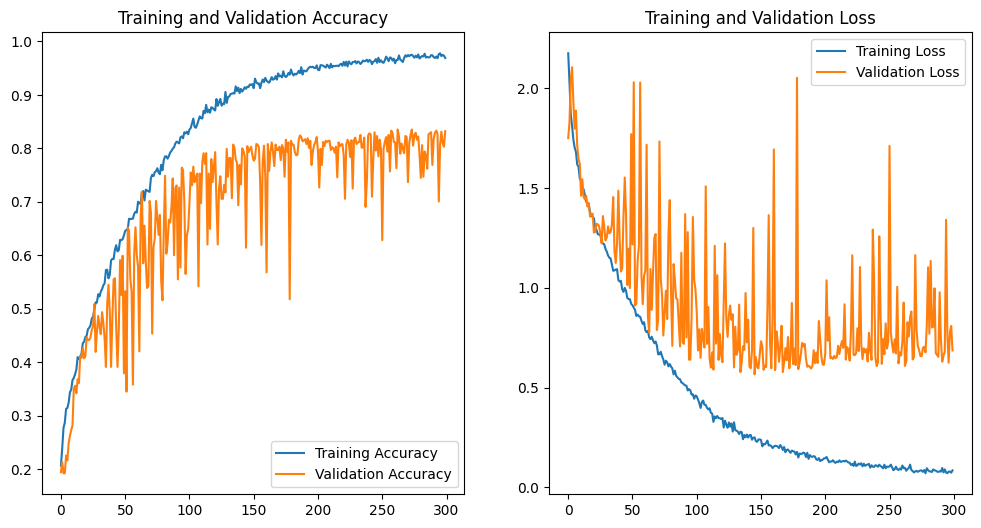

In [5]:
acc = detector.history['accuracy']  
val_acc = detector.history['val_accuracy']
loss = detector.history['loss']
val_loss = detector.history['val_loss']

epochs_range = range(300)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
from sklearn.metrics import classification_report
predictions= model1.predict(x_test)
class_predictions=[]
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)
    
print(classification_report(y_test,class_predictions))

30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

W0000 00:00:1713288193.673567      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       202
           1       0.75      0.90      0.82       208
           2       0.85      0.76      0.80       200
           3       0.85      0.79      0.82       194
           4       0.86      0.86      0.86       192

    accuracy                           0.83       996
   macro avg       0.84      0.83      0.83       996
weighted avg       0.84      0.83      0.83       996



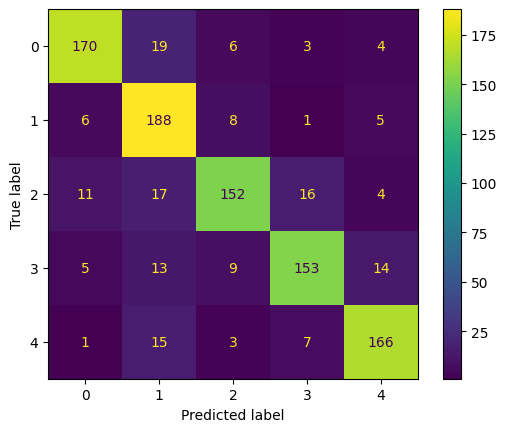

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, class_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [35]:
from keras.applications import VGG16
model2=VGG16(weights=None,input_shape=(128,128,3),classes=5)
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model2.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model2.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,075,013 (248.24 MB)

 Trainable params: 65,075,013 (248.24 MB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
detector=model2.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test),epochs=50)
print("Accuracy :",model2.evaluate(x_test, y_test))

Epoch 1/50
  2/125 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.1719 - loss: 1.6101

W0000 00:00:1713904340.308629      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1965 - loss: 1.6099

W0000 00:00:1713904350.615803      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713904351.885074      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.1965 - loss: 1.6099 - val_accuracy: 0.2068 - val_loss: 1.6096
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.1998 - loss: 1.6107 - val_accuracy: 0.1978 - val_loss: 1.6093
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2034 - loss: 1.6105 - val_accuracy: 0.1878 - val_loss: 1.6106
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2032 - loss: 1.6091 - val_accuracy: 0.2068 - val_loss: 1.6589
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2162 - loss: 1.6091 - val_accuracy: 0.2078 - val_loss: 1.6082
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2400 - loss: 1.5992 - val_accuracy: 0.2882 - val_loss: 1.5925
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.2698 - loss: 1.5808 - val_accuracy: 0.1998 - val_loss: 1.5902
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.3161 - loss: 1.5452 - val_accura

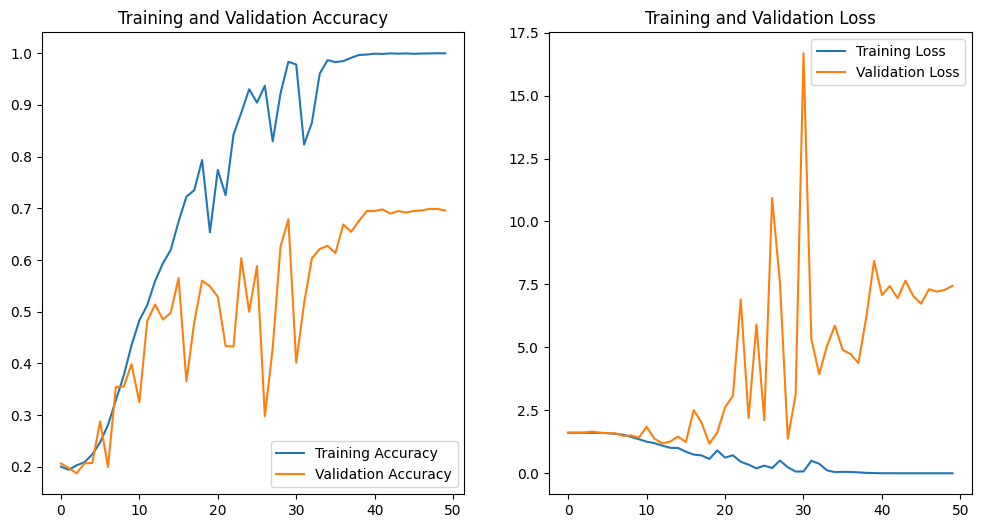

In [37]:
acc = detector.history['accuracy']  
val_acc = detector.history['val_accuracy']
loss = detector.history['loss']
val_loss = detector.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
from sklearn.metrics import classification_report
predictions= model2.predict(x_test)
class_predictions=[]
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)
    
print(classification_report(y_test,class_predictions))

10/32 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

W0000 00:00:1713904833.345443      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       187
           1       0.72      0.73      0.72       206
           2       0.58      0.55      0.57       195
           3       0.68      0.66      0.67       193
           4       0.73      0.82      0.77       215

    accuracy                           0.70       996
   macro avg       0.69      0.69      0.69       996
weighted avg       0.69      0.70      0.69       996



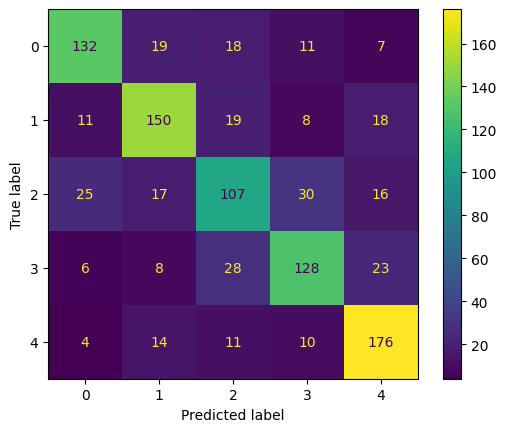

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, class_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [25]:
from keras.applications import InceptionV3
model4=InceptionV3(weights=None,input_shape=(128,128,3),classes=5)
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model4.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model4.summary())

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 63, 63,    │        864 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │         96 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 61, 61,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_49[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 61, 61,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_50[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 30, 30,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 30, 30,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_51[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 28, 28,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_52[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 21,813,029 (83.21 MB)

 Trainable params: 21,778,597 (83.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

None


In [26]:
detector=model4.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test),epochs=50)
print("Accuracy :",model4.evaluate(x_test, y_test))

Epoch 1/50
  2/125 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.1875 - loss: 2.1782    

W0000 00:00:1713936153.366928      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.2020 - loss: 2.8730

W0000 00:00:1713936210.754064      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 147s 520ms/step - accuracy: 0.2020 - loss: 2.8690 - val_accuracy: 0.2008 - val_loss: 56205.0703
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.1883 - loss: 1.8891 - val_accuracy: 0.2149 - val_loss: 161.4561
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.1988 - loss: 1.6916 - val_accuracy: 0.2189 - val_loss: 9.7844
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.2242 - loss: 1.7252 - val_accuracy: 0.2229 - val_loss: 2.5339
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.2340 - loss: 1.6485 - val_accuracy: 0.2329 - val_loss: 4.2653
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.2497 - loss: 1.6670 - val_accuracy: 0.2028 - val_loss: 1.7639
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.2606 - loss: 1.6117 - val_accuracy: 0.2811 - val_loss: 1.6185
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.2902 - loss: 1.5621 - val

In [27]:
detector1=model4.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test),epochs=50)
print("Accuracy :",model4.evaluate(x_test, y_test))

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9690 - loss: 0.0876 - val_accuracy: 0.5984 - val_loss: 2.5213
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9751 - loss: 0.0799 - val_accuracy: 0.5924 - val_loss: 2.5845
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9636 - loss: 0.1031 - val_accuracy: 0.7048 - val_loss: 1.2406
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9751 - loss: 0.0777 - val_accuracy: 0.7249 - val_loss: 1.2621
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9769 - loss: 0.0629 - val_accuracy: 0.6586 - val_loss: 1.4289
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9829 - loss: 0.0500 - val_accuracy: 0.4398 - val_loss: 3.1718
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9347 - loss: 0.1977 - val_accuracy: 0.6717 - val_loss: 1.8088
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9782 - loss: 0.0678 - 

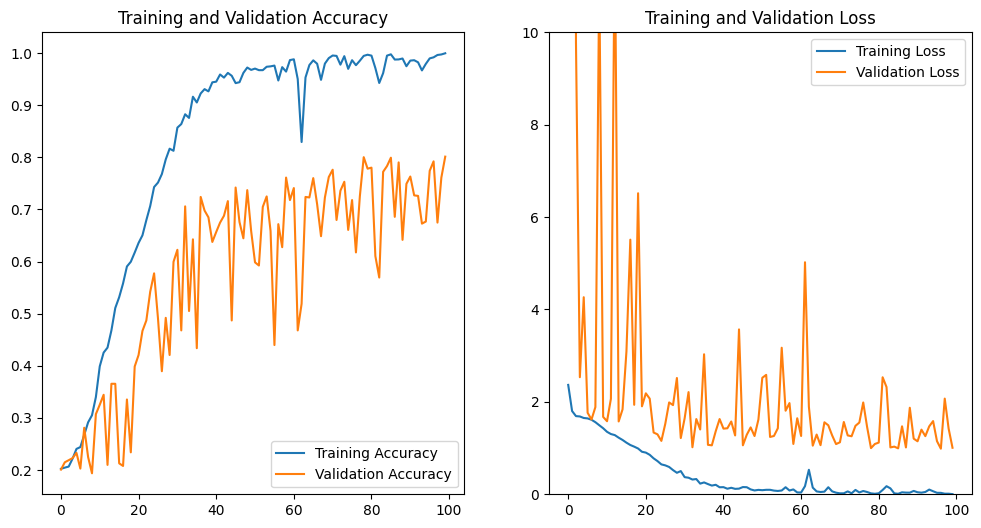

In [30]:
acc = detector.history['accuracy']+ detector1.history['accuracy']
val_acc = detector.history['val_accuracy'] + detector1.history['val_accuracy']
loss = detector.history['loss']+detector1.history['loss']
val_loss = detector.history['val_loss']+detector1.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.ylim(0,10)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
from sklearn.metrics import classification_report
predictions= model4.predict(x_test)
class_predictions=[]
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)
    
print(classification_report(y_test,class_predictions))

11/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

W0000 00:00:1713937635.126205      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       212
           1       0.95      0.81      0.87       194
           2       0.64      0.84      0.72       196
           3       0.85      0.70      0.77       200
           4       0.88      0.87      0.87       194

    accuracy                           0.80       996
   macro avg       0.82      0.80      0.80       996
weighted avg       0.82      0.80      0.80       996



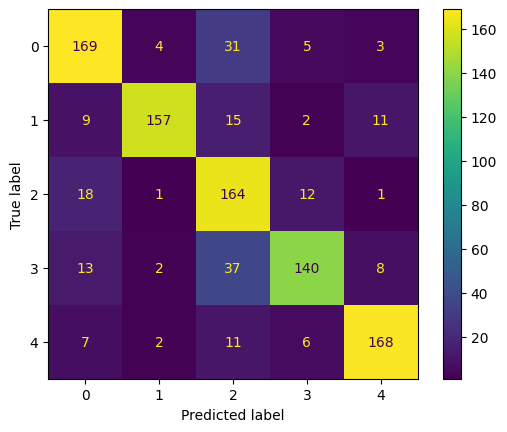

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, class_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
from keras.applications import ResNet50
model1=ResNet50(weights=None,input_shape=(128,128,3),classes=5)
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model1.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model1.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer_14[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 23,544,837 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


In [35]:
detector=model1.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test),epochs=50)
print("Accuracy :",model1.evaluate(x_test, y_test))

Epoch 1/50
  3/125 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.2083 - loss: 11.2352  

W0000 00:00:1713937853.613733      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.1860 - loss: 6.9726

W0000 00:00:1713937884.396216      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 280ms/step - accuracy: 0.1860 - loss: 6.9463 - val_accuracy: 0.1948 - val_loss: 14.7222
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2348 - loss: 1.8637 - val_accuracy: 0.2118 - val_loss: 2.6450
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2970 - loss: 1.6504 - val_accuracy: 0.2460 - val_loss: 1.8177
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.3834 - loss: 1.5294 - val_accuracy: 0.3604 - val_loss: 1.7485
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.4394 - loss: 1.3995 - val_accuracy: 0.4287 - val_loss: 2.0638
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.4599 - loss: 1.3406 - val_accuracy: 0.4598 - val_loss: 1.5862
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5261 - loss: 1.2251 - val_accuracy: 0.4869 - val_loss: 1.4959
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5755 - loss: 1.1263 - val_accuracy: 0.

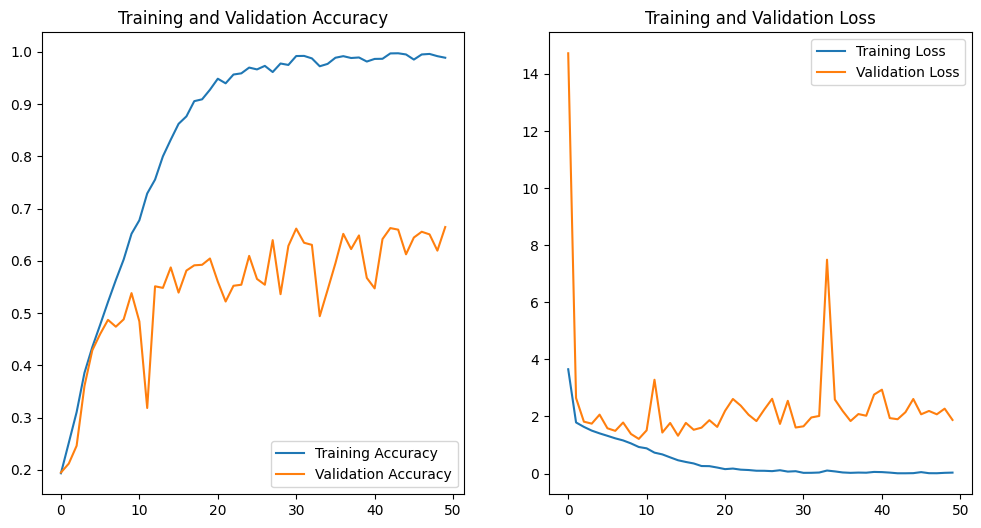

In [36]:
acc = detector.history['accuracy']  
val_acc = detector.history['val_accuracy']
loss = detector.history['loss']
val_loss = detector.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
from sklearn.metrics import classification_report
predictions= model1.predict(x_test)
class_predictions=[]
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)
    
print(classification_report(y_test,class_predictions))

12/32 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

W0000 00:00:1713938432.619351      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       212
           1       0.76      0.72      0.74       194
           2       0.53      0.70      0.60       196
           3       0.65      0.52      0.58       200
           4       0.74      0.75      0.75       194

    accuracy                           0.66       996
   macro avg       0.67      0.67      0.67       996
weighted avg       0.67      0.66      0.67       996



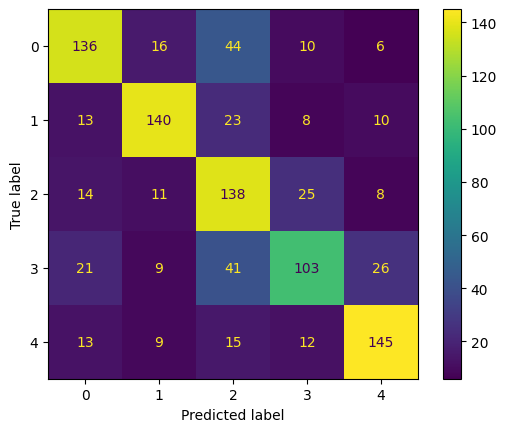

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, class_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<BarContainer object of 5 artists>

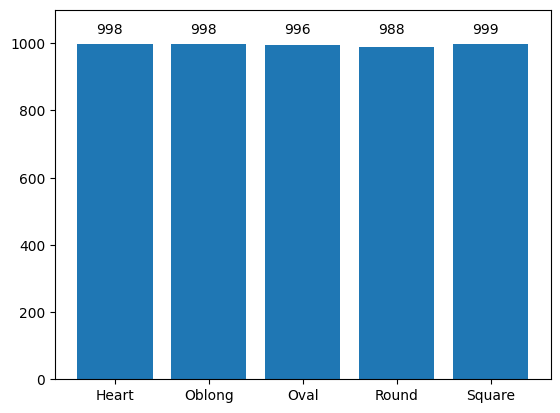

In [17]:
l=[]
for i in range(len(labels)):
    l.append(result.count(i))
plt.ylim([0,1100])

plt.text(-0.2,1030,l[0])
plt.text(0.8,1030,l[1])
plt.text(1.8,1030,l[2])
plt.text(2.8,1030,l[3])
plt.text(3.8,1030,l[4])
plt.bar(labels,l)

In [27]:
len(result)

4979

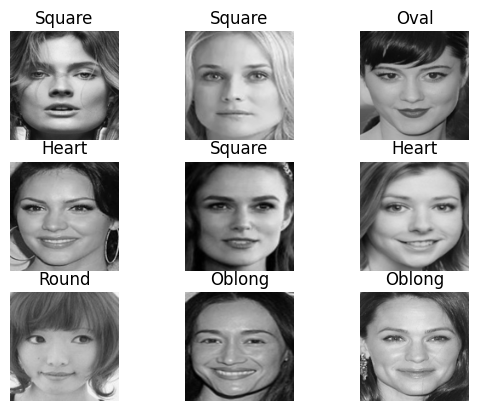

In [30]:
import random
figure, axis = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        r=random.randint(0,4978)
        axis[i,j].axis('off')
        axis[i,j].set_title(labels[result[r]])
        axis[i,j].imshow(data[r])


<BarContainer object of 4 artists>

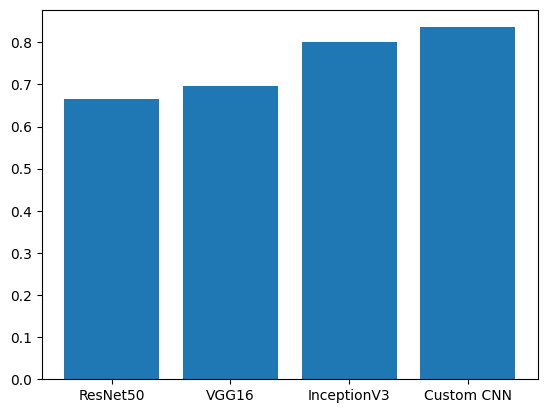

In [3]:
l=[0.6646586060523987,0.6957831382751465,0.8012048006057739,0.835603234055421]
plt.bar(["ResNet50","VGG16","InceptionV3","Custom CNN"],l)